In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,[3,4]].values

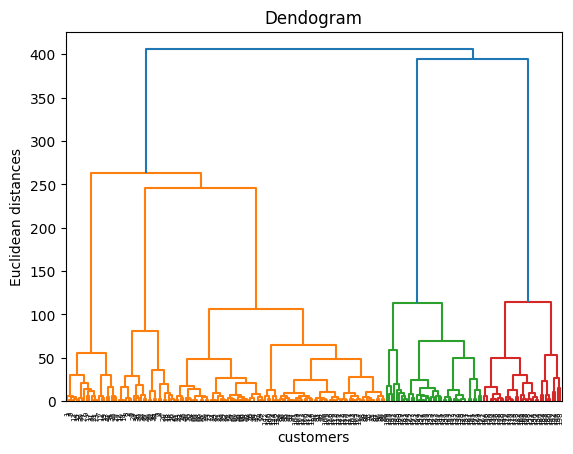

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('customers')
plt.ylabel('Euclidean distances')
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
clusmodel=AgglomerativeClustering(n_clusters=10)
lable=clusmodel.fit_predict(x)

In [16]:
supervised=pd.DataFrame(dataset)

In [17]:
supervised['Cluster_group']=lable

In [18]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,8
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,6
197,198,Male,32,126,74,2
198,199,Male,32,137,18,6


C:\Users\ELCOT\Anaconda3\envs\aimml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


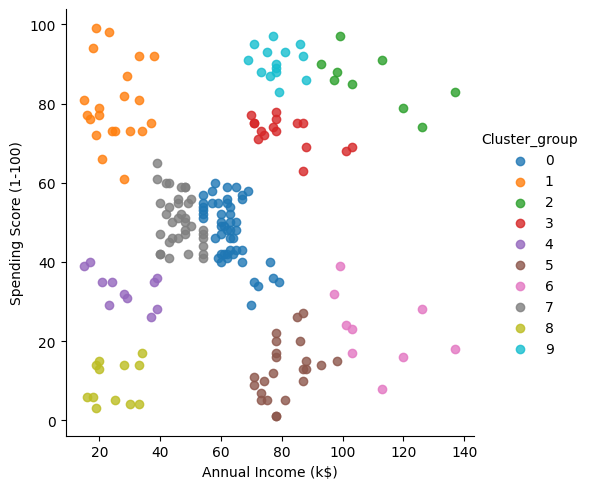

In [19]:
import seaborn as sns
supervised_columns = supervised.columns
facet=sns.lmplot(data=supervised,x=supervised_columns[3],y=supervised_columns[4],hue=supervised_columns[5],fit_reg=False,legend=True,legend_out=True)